In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
dfcand=pd.read_csv("candidates.txt", sep='|')
dfcwci=pd.read_csv("contributors_with_candidate_id.txt", sep="|")

In [ ]:
dfmerged = dfcwci.merge(dfcand, left_on="candidate_id", right_on="id", how="outer")
dfmerged

In [4]:
dfmerged.pivot_table(values='amount', columns='party', index='state', aggfunc='sum')

party,D,R
state,,
AK,NaN,1210.00
AR,NaN,14200.00
AZ,NaN,120.00
CA,1660.80,-6674.53
CO,NaN,-5823.00
CT,NaN,2300.00
DC,200.09,-1750.00
FL,4250.00,-8300.00
IA,NaN,250.00


In [5]:
dfmerged.pivot_table(values='amount', index=['party', 'state'], aggfunc='sum')

party  state
D      CA        1660.80
       DC         200.09
       FL        4250.00
       IL         200.00
       MA         195.00
       MD          50.00
       ME        2520.00
       MI         500.00
       MN         350.00
       MO         100.00
       NY       -2650.00
       OK         800.00
       UT        4600.00
       VA         100.00
       WA         200.00
R      AK        1210.00
       AR       14200.00
       AZ         120.00
       CA       -6674.53
       CO       -5823.00
       CT        2300.00
       DC       -1750.00
       FL       -8300.00
       IA         250.00
       ID        -261.00
       IL       -5786.80
       KS        -330.00
       KY        -200.00
       LA        1300.00
       MA        -278.00
       MD         250.00
       MI       -1765.00
       MN         -28.00
       NC         500.00
       NH         -24.60
       NJ        -817.45
       NV         725.00
       NY       -3824.50
       OH         450.00
       PA   

2 . Ladda ner data om parkeringsböter i Helsingfors från: https://www.avoindata.fi/data/fi/dataset/pysakointivirheet-helsingissa

(a) Hitta de 5 vanligaste bötesorsakerna ("Virheen pääluokka / pääsyy"). Märk att en rad kan innehålla fler än en orsak!

In [6]:
virheet = pd.read_csv('Pysakointivirheet.csv', sep=';', encoding='ISO-8859-15')

In [7]:
# Alternativt importera Excel-versionen (OBS mycket långsammare):
virheet = pd.read_excel('Pysakointivirheet.xlsx')

Det fattas data från några rader i tabellen, så vi tar bort dem med funktionen `dropna()`

In [8]:
virheet[virheet.isnull().any(1)]

,Virheen tekokuukausi,Virheen tekovuosi,Osoite,Virhemaksun vaihe,Virheen pääluokka / pääsyy,Virheen kirjaaja,y,x,Postinumero,Postitoimipaikka,Alue,Kunta,Kunta_nro
2174,Kesäkuu,2016,Hernesaarenranta 1,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.671131e+06,2.549609e+07,150.0,HELSINKI,Eira,Helsinki,91.0
14215,Huhtikuu,2015,Neitsytpolku 2b,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.671501e+06,2.549720e+07,140.0,HELSINKI,Kaivopuisto,Helsinki,91.0
27110,Kesäkuu,2015,Puistokatu 1,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.671792e+06,2.549746e+07,140.0,HELSINKI,Kaivopuisto,Helsinki,91.0
27601,Toukokuu,2016,Pursimiehenkatu 16,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.671806e+06,2.549655e+07,150.0,HELSINKI,Eira,Helsinki,91.0
36550,Huhtikuu,2015,Laivurinkatu 43,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.671969e+06,2.549681e+07,150.0,HELSINKI,Eira,Helsinki,91.0
57850,Toukokuu,2016,Eteläranta 7,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.672311e+06,2.549751e+07,130.0,HELSINKI,Kaartinkaupunki,Helsinki,91.0
64395,Toukokuu,2016,Kasarmikatu 28,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.672345e+06,2.549710e+07,130.0,HELSINKI,Kaartinkaupunki,Helsinki,91.0
69433,Lokakuu,2015,Lönnrotinkatu 25,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.672431e+06,2.549629e+07,180.0,HELSINKI,Ruoholahti,Helsinki,91.0
80704,Toukokuu,2016,Yrjönkatu 7,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.672545e+06,2.549680e+07,120.0,HELSINKI,Punavuori,Helsinki,91.0
85896,Kesäkuu,2015,Amiraalinkatu 2,Pysäköintivirhemaksu,NaN,Pysäköinnintarkastaja,6.672578e+06,2.549853e+07,160.0,HELSINKI,Katajanokka,Helsinki,91.0


In [9]:
print virheet.shape
virheet.dropna(inplace=True)
print virheet.shape

(393619, 13)
(393581, 13)


In [10]:
virheet["Virheen tekovuosi"]=virheet["Virheen tekovuosi"].astype(int)
virheet["Postinumero"]=virheet["Postinumero"].astype(int)
virheet["Kunta_nro"]=virheet["Kunta_nro"].astype(int)
virheet.head()

,Virheen tekokuukausi,Virheen tekovuosi,Osoite,Virhemaksun vaihe,Virheen pääluokka / pääsyy,Virheen kirjaaja,y,x,Postinumero,Postitoimipaikka,Alue,Kunta,Kunta_nro
0,Huhtikuu,2015,Purjeentekijänkuja 1a,Pysäköintivirhemaksu,0401 Pysäköintikieltoalue liikennemerkin nouda...,Pysäköinnintarkastaja,6670492.0,25493771.0,210,HELSINKI,Vattuniemi,Helsinki,91
1,Maaliskuu,2015,Särkiniementie 1,Huomautus,2500 Ei tosiasiallisesti liikennekäytössä ; 25...,Pysäköinnintarkastaja,6670496.0,25493252.0,210,HELSINKI,Vattuniemi,Helsinki,91
2,Helmikuu,2016,Särkiniementie 2,Pysäköintivirhemaksu,2302 Pysäköinti ilman pysäköintikiekkoa/p-tunn...,Pysäköinnintarkastaja,6670496.0,25493192.0,210,HELSINKI,Vattuniemi,Helsinki,91
3,Toukokuu,2014,Itälahdenkatu 1,Pysäköintivirhemaksu,0400 Pysäköintikieltoalue liikennemerkin nouda...,Pysäköinnintarkastaja,6670514.0,25493505.0,210,HELSINKI,Vattuniemi,Helsinki,91
4,Tammikuu,2014,Itälahdenkatu 1,Pysäköintivirhemaksu,0400 Pysäköintikieltoalue liikennemerkin nouda...,Pysäköinnintarkastaja,6670514.0,25493505.0,210,HELSINKI,Vattuniemi,Helsinki,91


Hitta rätt kolumn och få ut rätt data:

In [11]:
virheet.columns[4]

u'Virheen p\xe4\xe4luokka / p\xe4\xe4syy'

In [ ]:
# Det här funkar inte i python 2 för att unicode hanteras skilt
virheet['Virheen pääluokka / pääsyy']

In [ ]:
# I stället måste man specifiera namnet som unicode objekt med u:
virheet[u'Virheen pääluokka / pääsyy']

In [16]:
# Varje rad kan innehålla flera orsaker med ';' emellan, så vi delar upp raden vid varje ';'
syyt_all = [elem for s in virheet[u'Virheen pääluokka / pääsyy'] for elem in s.split(' ; ')]
syyt_all[:5]

[u'0401 Pys\xe4k\xf6intikieltoalue liikennemerkin noudattamatta j\xe4tt\xe4minen',
 u'2500 Ei tosiasiallisesti liikennek\xe4yt\xf6ss\xe4',
 u'2501 Ei saa s\xe4ilytt\xe4\xe4 katualueella',
 u'2302 Pys\xe4k\xf6inti ilman pys\xe4k\xf6intikiekkoa/p-tunnusta',
 u'0400 Pys\xe4k\xf6intikieltoalue liikennemerkin noudattamatta j\xe4tt\xe4minen']

Vi kan ta in datan i pandas igen som ett nytt objekt Series, för att använda färdiga behändiga funktioner som `value_counts()`

In [17]:
pd.Series(syyt_all).value_counts().head()

0301 Pysäköinti kielletty liikennemerkin noudattamatta jättäminen    54039
0601 pysäköinti ilman p-tunnusta/p-laitetta/p-lippua                 50257
0401 Pysäköintikieltoalue liikennemerkin noudattamatta jättäminen    43491
0702 pysäköinti ilman p-laitetta/p-lippua                            40217
1600 Luvaton pysäköinti yksityisalueelle                             30712
dtype: int64

Eller samma sak med groupby:

In [18]:
nyseries = pd.Series(syyt_all)
nyseries.groupby(nyseries).count().sort_values(ascending=False).head()

0301 Pysäköinti kielletty liikennemerkin noudattamatta jättäminen    54039
0601 pysäköinti ilman p-tunnusta/p-laitetta/p-lippua                 50257
0401 Pysäköintikieltoalue liikennemerkin noudattamatta jättäminen    43491
0702 pysäköinti ilman p-laitetta/p-lippua                            40217
1600 Luvaton pysäköinti yksityisalueelle                             30712
dtype: int64

(b) Rita en graf av böternas antal per månad (från januari 2014 till senaste data)

In [19]:
virheet['Virheen tekokuukausi'].head()

0     Huhtikuu
1    Maaliskuu
2     Helmikuu
3     Toukokuu
4     Tammikuu
Name: Virheen tekokuukausi, dtype: object

In [20]:
!locale -a

C
C.UTF-8
en_AG
en_AG.utf8
en_AU.utf8
en_BW.utf8
en_CA.utf8
en_DK.utf8
en_GB.utf8
en_HK.utf8
en_IE.utf8
en_IN
en_IN.utf8
en_NG
en_NG.utf8
en_NZ.utf8
en_PH.utf8
en_SG.utf8
en_US.utf8
en_ZA.utf8
en_ZM
en_ZM.utf8
en_ZW.utf8
fi_FI.utf8
POSIX


In [21]:
import locale
locale.setlocale(locale.LC_ALL,'fi_FI.UTF-8')   # <-- Linux / Mac
#locale.setlocale(locale.LC_ALL,'fin')   # <-- Windows
import calendar
print calendar.month_name
print [m for m in calendar.month_name]

<calendar._localized_month instance at 0x7fadbcdc2ea8>
['', 'tammikuu', 'helmikuu', 'maaliskuu', 'huhtikuu', 'toukokuu', 'kes\xc3\xa4kuu', 'hein\xc3\xa4kuu', 'elokuu', 'syyskuu', 'lokakuu', 'marraskuu', 'joulukuu']


In [22]:
monthabb = [m[0:3].lower() for m in calendar.month_name]
print monthabb

['', 'tam', 'hel', 'maa', 'huh', 'tou', 'kes', 'hei', 'elo', 'syy', 'lok', 'mar', 'jou']


In [23]:
# Funktion som tar in finska namnet eller förkortningen på en månad och ger ut ordingstalet
def month_to_number_fi(monthname):
    return monthabb.index(monthname[0:3].lower())


In [24]:
print month_to_number_fi('Heinäkuu')
print month_to_number_fi('hein\xc3\xa4kuu')
print month_to_number_fi(u'Kesä')
print month_to_number_fi(u'tam')

7
7
6
1


In [25]:
virheet['Virheen tekokuukausi'].apply(month_to_number_fi).head()

0    4
1    3
2    2
3    5
4    1
Name: Virheen tekokuukausi, dtype: int64

In [26]:
import datetime
years = virheet['Virheen tekovuosi'].astype(int)
months = virheet['Virheen tekokuukausi'].apply(month_to_number_fi)

In [27]:
datetime.datetime(2016,11,17)

datetime.datetime(2016, 11, 17, 0, 0)

In [ ]:
[datetime.datetime(y,m,1) for y,m in zip(years,months)]

In [29]:
virheet['Datetime'] = [datetime.datetime(y,m,1) for y,m in zip(years,months)]

In [30]:
virheet.dtypes

Virheen tekokuukausi                  object
Virheen tekovuosi                      int64
Osoite                                object
Virhemaksun vaihe                     object
Virheen pääluokka / pääsyy            object
Virheen kirjaaja                      object
y                                    float64
x                                    float64
Postinumero                            int64
Postitoimipaikka                      object
Alue                                  object
Kunta                                 object
Kunta_nro                              int64
Datetime                      datetime64[ns]
dtype: object

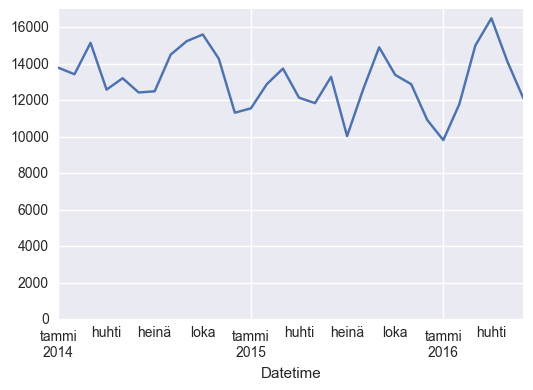

In [31]:
%matplotlib inline
virheet.groupby("Datetime").size().plot(ylim=0)

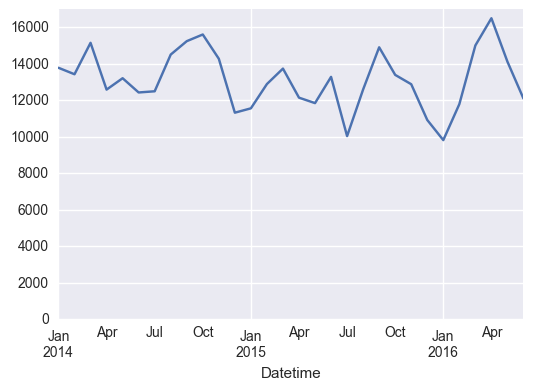

In [32]:
locale.setlocale(locale.LC_ALL,locale.getdefaultlocale())
virheet.groupby("Datetime").size().plot(ylim=0)

En barchart är egentligen bättre, fast då visas datumen automatiskt inte så fint:

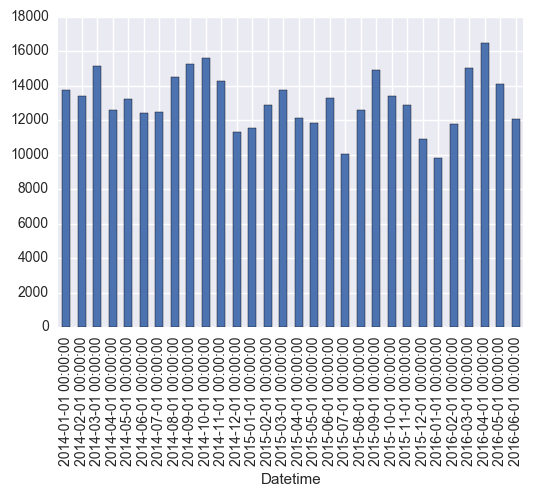

In [33]:
ax = virheet.groupby("Datetime").size().plot(kind='bar')

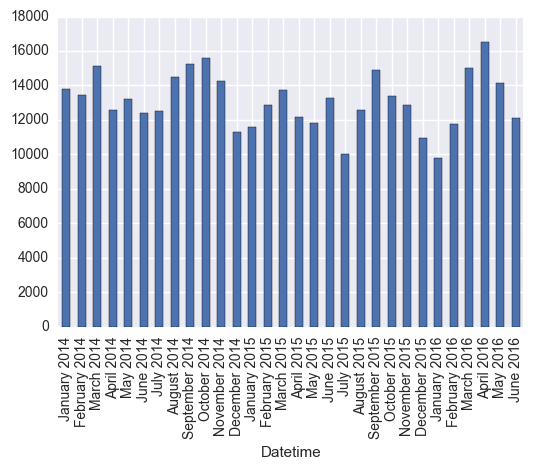

In [34]:
# Korrigerar hur månaderna visas
ax = virheet.groupby("Datetime").size().plot(kind='bar')
ax.set_xticklabels(d.strftime('%B %Y') for d in virheet["Datetime"].sort_values().drop_duplicates())
matplotlib.pyplot.show()

In [35]:
virheet["Virheen tekokuukausi"]=virheet["Virheen tekokuukausi"].astype("category", ['Tammikuu','Helmikuu','Maaliskuu',
                                                                                   'Huhtikuu','Toukokuu',u'Kesäkuu',
                                                                                   u'Heinäkuu','Elokuu','Syyskuu',
                                                                                   'Lokakuu','Marraskuu','Joulukuu'])

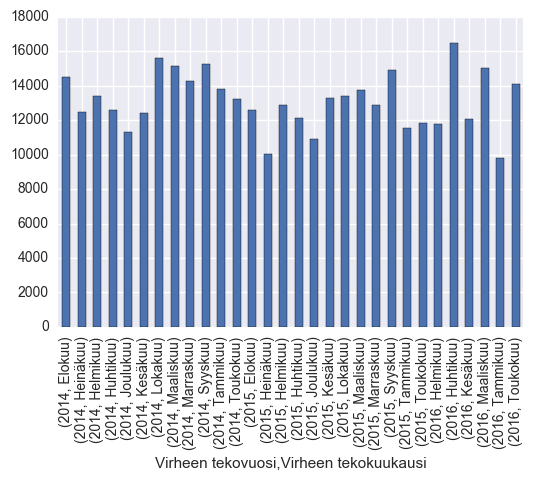

In [36]:
virheet.groupby(["Virheen tekovuosi","Virheen tekokuukausi"]).size().plot(kind='bar')